# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#for preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder , LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

#for evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score , accuracy_score , classification_report,silhouette_score , precision_score


#models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVC


import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")




# Read Dataset & Handle

In [2]:
df = pd.read_csv(r'C:\Users\Ahmed Ashraf\Desktop\archive (3)\archive (12)\005930.KS.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,39400.0,39400.0,38550.0,38750.0,33474.054688,7847664
1,2019-01-03,38300.0,38550.0,37450.0,37600.0,32480.634766,12471493
2,2019-01-04,37450.0,37600.0,36850.0,37450.0,32351.054688,14108958
3,2019-01-07,38000.0,38900.0,37800.0,38750.0,33474.054688,12748997
4,2019-01-08,38000.0,39200.0,37950.0,38100.0,32912.558594,12756554


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413 entries, 0 to 1412
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1413 non-null   object 
 1   Open       1413 non-null   float64
 2   High       1413 non-null   float64
 3   Low        1413 non-null   float64
 4   Close      1413 non-null   float64
 5   Adj Close  1413 non-null   float64
 6   Volume     1413 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 77.4+ KB


In [4]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df['Date']=pd.to_datetime(df['Date'])

# Data Visualization

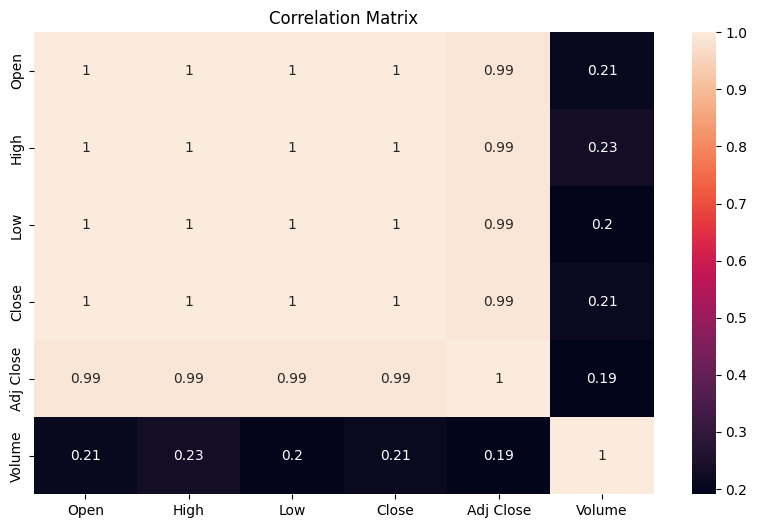

In [10]:
plt.figure(figsize=(10 , 6))
correlation_matrix = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()
sns.heatmap(correlation_matrix , annot=True)
plt.title("Correlation Matrix")
plt.show()


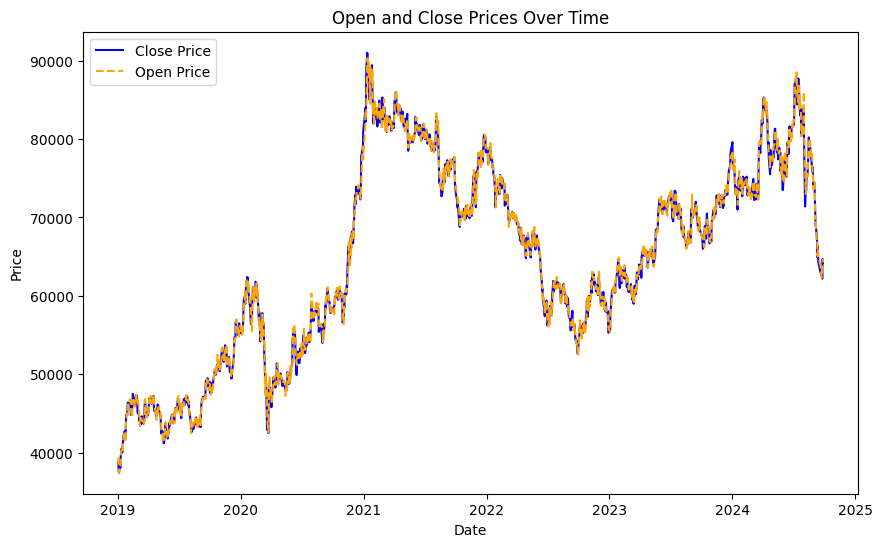

In [11]:
# Plot Open and Close Prices Over Time
plt.figure(figsize=(10, 6))
plt.plot(df['Date'] , df['Close'] , label='Close Price' , color='blue')
plt.plot(df['Date'], df['Open'], label='Open Price', color='orange', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title("Open and Close Prices Over Time")
plt.legend()
plt.show()


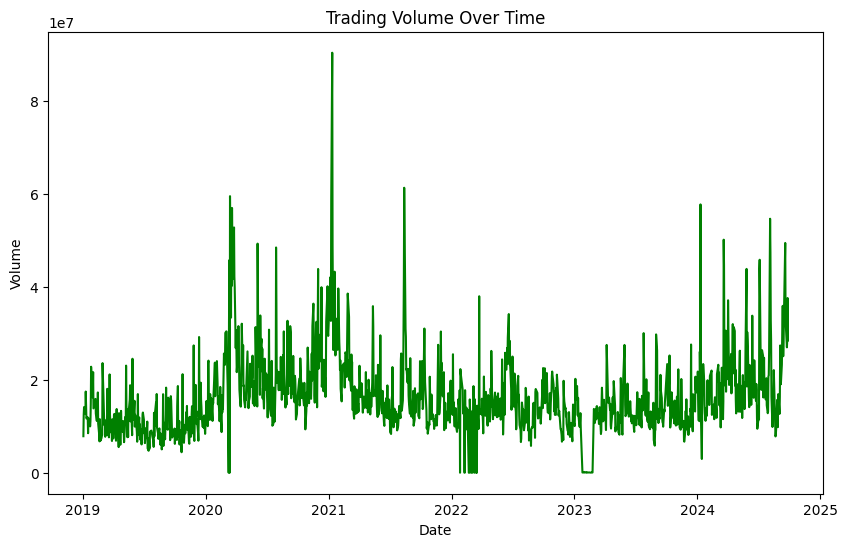

In [12]:
# Plot Trading Volume Over Time
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Volume'], label='Volume', color='green')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Trading Volume Over Time")
plt.show()

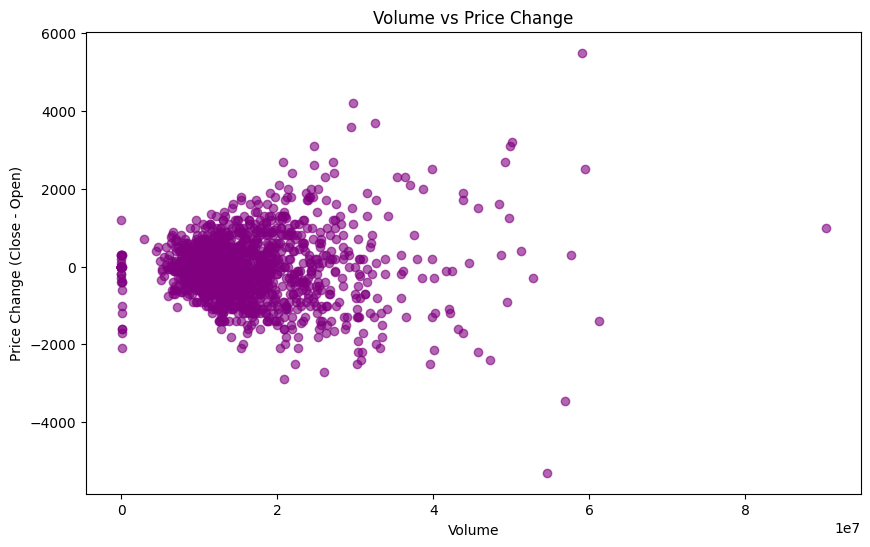

In [13]:
#Scatter Plot of Volume vs Price Change
price_change = df['Close'] - df['Open']
plt.figure(figsize=(10, 6))
plt.scatter(df['Volume'] , price_change , c='purple' , alpha=0.6)
plt.xlabel('Volume')
plt.ylabel('Price Change (Close - Open)')
plt.title("Volume vs Price Change")
plt.show()

# Split Data into train & test

In [17]:
df['Next_Close']=df['Close'].shift(-1)

In [18]:
df=df.dropna()

In [19]:
features = ['Open', 'High', 'Low', 'Volume']
x = df[features]

In [21]:
y=df['Next_Close']

# Build Linear Regression model

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=False)


In [23]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
y_pred = model.predict(X_test)


In [25]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1807966.8878739777


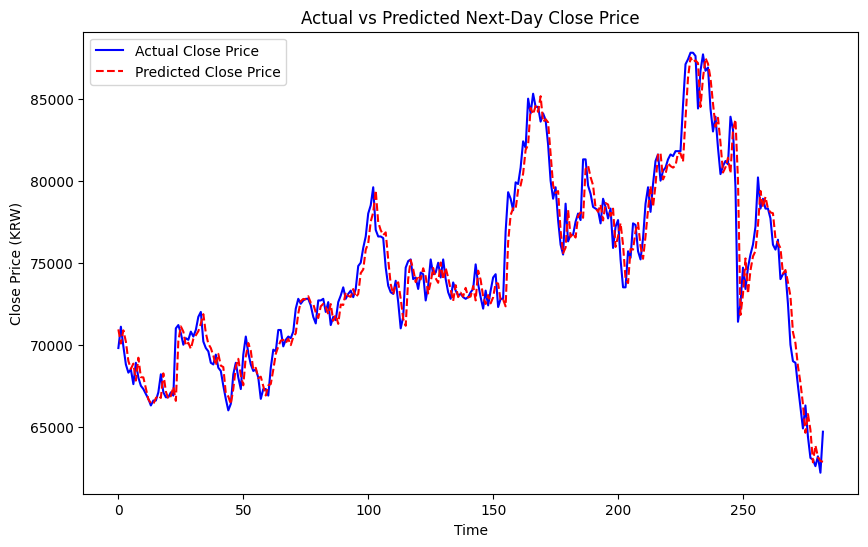

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Close Price', color='blue')
plt.plot(y_pred, label='Predicted Close Price', color='red', linestyle='--')
plt.title('Actual vs Predicted Next-Day Close Price')
plt.xlabel('Time')
plt.ylabel('Close Price (KRW)')
plt.legend()
plt.show()